### In this note book, a CNN model is generated to detect Skin cancer

### Dataset

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided in to the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

Dataset link: https://www.kaggle.com/datasets/rajivaiml/isic-skin-cancer-dataset

The data set contains images relating to the following types of skin cancer:
<br>Actinic keratosis
<br>Basal cell carcinoma
<br>Dermatofibroma
<br>Melanoma
<br>Nevus
<br>Pigmented benign keratosis
<br>Seborrheic keratosis
<br>Squamous cell carcinoma
<br>Vascular lesion

In [14]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import PIL.Image as Image
import numpy as np

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Skin_Cancer_Dataset/Train",
    image_size = (240,240),
    batch_size = 32
    )

Found 2239 files belonging to 9 classes.


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Skin_Cancer_Dataset/Test",
    image_size = (240,240),
    batch_size = 32
    )

Found 143 files belonging to 9 classes.


In [17]:
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [18]:
n_class = len(class_names)
n_class

9

In [65]:
print('Size od training dataset:',len(train_ds),'batches of 32 batch size')
print('Size od testing dataset:',len(test_ds),'batches of 32 batch size')

Size od training dataset: 70
Size od testing dataset: 5


### Display sample images in the dataset

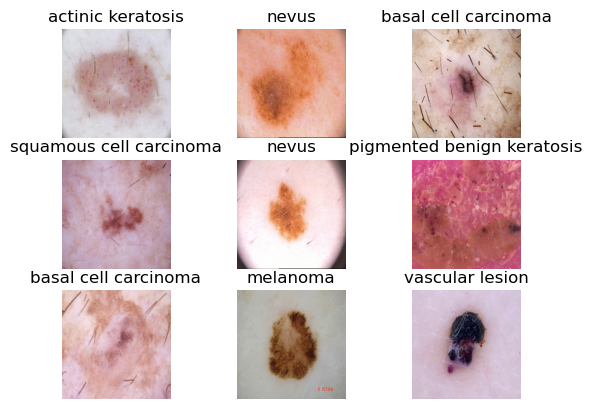

In [57]:
for i in range(0,9):
    for image_batch, label_batch in train_ds.take(1):
        #plt.figure(figsize=(3,3))
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [59]:
image_batch.shape

TensorShape([32, 240, 240, 3])

### Resizing and Rescaling

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(240,240), #If any input image is of not this size
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

### Data Augmentation

In [42]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(240, 
                                                              240,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

### Cache and Prefetch pipelines

In [82]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Create a CNN model for training

In [83]:
input_shape = (32,240,240,3)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation='softmax'),
])

model.build(input_shape=input_shape)

In [84]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (32, 240, 240, 3)         0         
                                                                 
 sequential_17 (Sequential)  (None, 240, 240, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (32, 238, 238, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 119, 119, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 117, 117, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 58, 58, 64)         0         
 g2D)                                                

In [85]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=test_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
70/70 [==============================] - 251s 3s/step - loss: 2.0612 - accuracy: 0.1956 - val_loss: 2.2187 - val_accuracy: 0.1356
Epoch 2/10
70/70 [==============================] - 198s 3s/step - loss: 1.9592 - accuracy: 0.2394 - val_loss: 2.2847 - val_accuracy: 0.2458
Epoch 3/10
70/70 [==============================] - 197s 3s/step - loss: 1.8496 - accuracy: 0.2876 - val_loss: 2.2091 - val_accuracy: 0.2119
Epoch 4/10
70/70 [==============================] - 197s 3s/step - loss: 1.7223 - accuracy: 0.3510 - val_loss: 2.3707 - val_accuracy: 0.1949
Epoch 5/10
70/70 [==============================] - 201s 3s/step - loss: 1.6544 - accuracy: 0.3877 - val_loss: 2.2000 - val_accuracy: 0.2627
Epoch 6/10
70/70 [==============================] - 230s 3s/step - loss: 1.6071 - accuracy: 0.4185 - val_loss: 2.4200 - val_accuracy: 0.3220
Epoch 7/10
70/70 [==============================] - 230s 3s/step - loss: 1.5388 - accuracy: 0.4364 - val_loss: 2.3440 - val_accuracy: 0.3305
Epoch 8/10
70

### Plot Accuracy and Loss

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc="upper right")
plt.title("Loss")

plt.show()

After 10 epochs, Training Accuracy = 50% and Validation Accuracy = 33%

###  Model using transfer learning

Used pre-trained model from google's Tensorflow Hub ([TF2] EfficientNet V2 with input size 240x240, trained on imagenet-21k (Full ImageNet, Fall 2011 release) and re-train that on the dataset

Link: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2

In [23]:
import tensorflow_hub as hub

In [24]:
pretrained_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
                   trainable=False), 
   ])

In [87]:
model_new = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    pretrained_model,
    tf.keras.layers.Dense(n_class)
])
model_new.summary()

In [88]:
model_new.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [89]:
history = model_new.fit(
    train_ds,
    batch_size=32,
    validation_data=test_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
70/70 [==============================] - 239s 3s/step - loss: 1.8256 - acc: 0.3595 - val_loss: 1.9039 - val_acc: 0.3136
Epoch 2/20
70/70 [==============================] - 194s 3s/step - loss: 1.3580 - acc: 0.5234 - val_loss: 1.7249 - val_acc: 0.4068
Epoch 3/20
70/70 [==============================] - 182s 3s/step - loss: 1.2436 - acc: 0.5726 - val_loss: 1.7464 - val_acc: 0.4322
Epoch 4/20
70/70 [==============================] - 177s 3s/step - loss: 1.1542 - acc: 0.6021 - val_loss: 1.8092 - val_acc: 0.4576
Epoch 5/20
70/70 [==============================] - 175s 3s/step - loss: 1.0873 - acc: 0.6275 - val_loss: 1.8491 - val_acc: 0.4576
Epoch 6/20
70/70 [==============================] - 176s 3s/step - loss: 1.0504 - acc: 0.6315 - val_loss: 1.9259 - val_acc: 0.4661
Epoch 7/20
70/70 [==============================] - 173s 2s/step - loss: 1.0282 - acc: 0.6382 - val_loss: 1.8501 - val_acc: 0.4407
Epoch 8/20
70/70 [==============================] - 171s 2s/step - loss: 0.9719 - a

The model shows training accuracy: 73% and validation accuracy:46% after 20 epochs.

### Plot data in each classes

<BarContainer object of 9 artists>

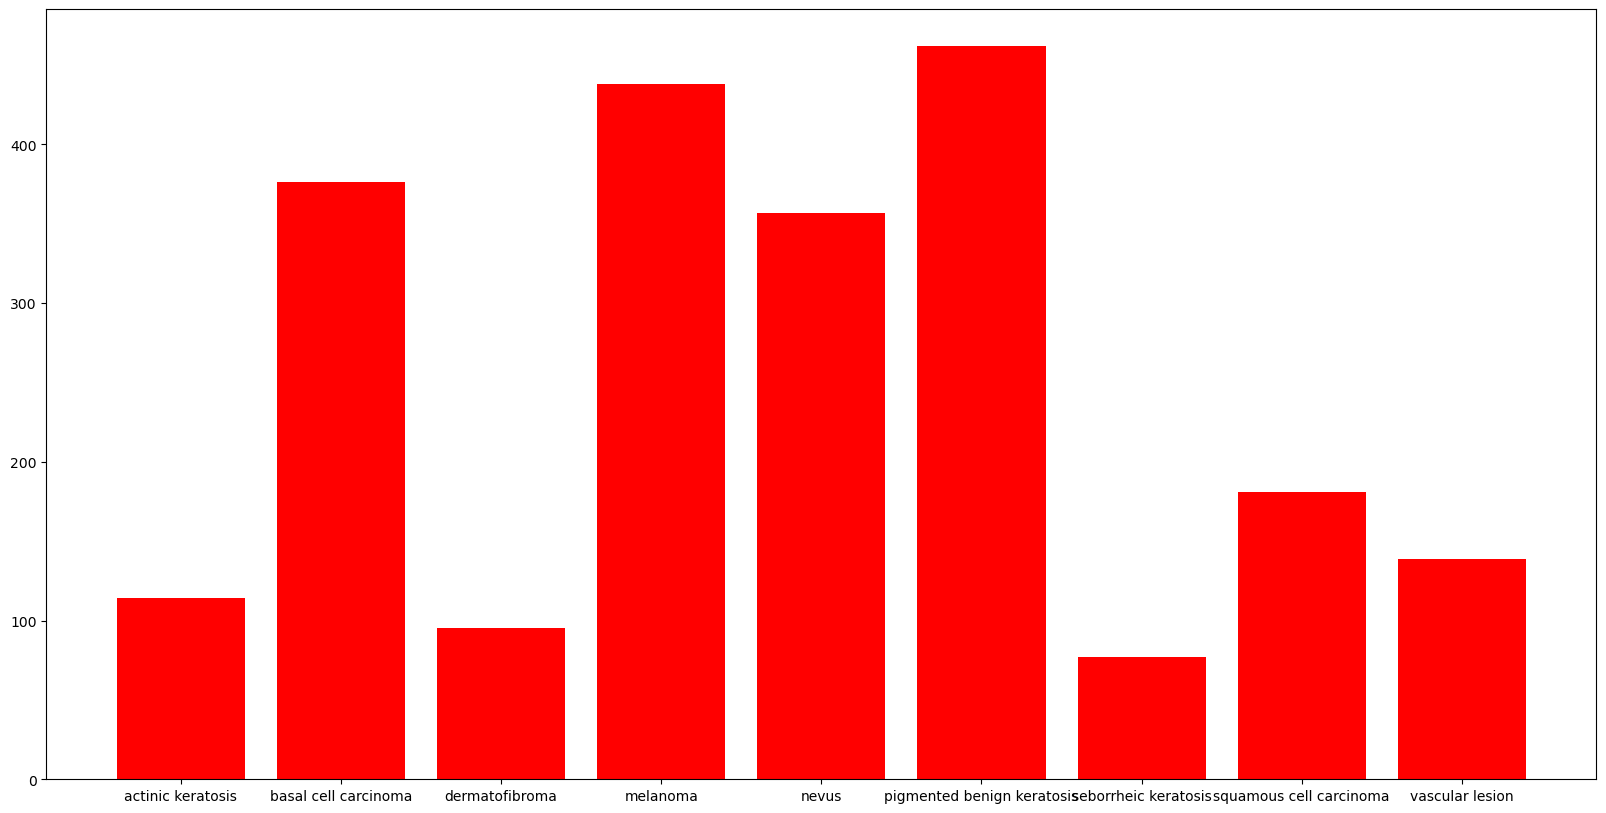

In [80]:
import os

path = r"C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Train"
count=[]
num=0
for i in range(0,n_class):
    test_dir = path + '\\'+ class_names[i]
    for entry in os.scandir(test_dir):
        #print(entry)
        num +=1
    count.append(num)
    num =0
count
plt.figure(figsize=(20,10))
plt.bar(class_names, count, color = 'r')

This indicates unbalanced dataset. 

Various methods to handle unbalanced dataset are:
<br> 1. Undersampling - it is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.
<br> 2. Oversampling - Oversampling is basically the opposite of undersampling, where duplicate random images from the minority class or synthesize images in the minority class using specific algorithms or methods.Eg. SMOTE(Synthetic Minority Oversampling Technique).
<br> 3. Merge similar classes - In a multiclass classification problem, there could be minority classes that share similar features (or maybe not) and by being able to identify classes that can be merged into one can probably save you the time on gathering more images.
<br> 4. Data Augmentation - A technique used to increase the amount of data by adding slightly modified(flip, filter, crop,rotation,translation) copies of already existing data or newly created synthetic data from existing data. Some augmentation libraries are Augmentor, Imgaug, Albumentation.
<br> Here we used Augmentor

In [159]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [182]:
import Augmentor
out_dir = r"C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug"
for i in class_names:
    p = Augmentor.Pipeline(path+'/'+i,output_directory=out_dir+'/'+i)
    p.rotate(probability=0.8,max_left_rotation=0.15, max_right_rotation=0.15)
    p.sample(400)
                           

Initialised with 114 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2324CB5A710>: 100%|█| 400/400 [00:07<00:00, 50.30 Samples/


Initialised with 376 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2320DE17070>: 100%|█| 400/400 [00:07<00:00, 54.47 Samples/


Initialised with 95 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2320DEB0550>: 100%|█| 400/400 [00:07<00:00, 53.46 Samples/


Initialised with 438 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/melanoma.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2325FCFD2D0>: 100%|█| 400/400 [00:51<00:00,  7.80 Sample


Initialised with 357 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/nevus.

Processing <PIL.Image.Image image mode=RGB size=853x680 at 0x2325FD31B10>: 100%|█| 400/400 [00:31<00:00, 12.58 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x232ED9DE890>: 100%|█| 400/400 [00:07<00:00, 53.14 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x232ED974DF0>: 100%|█| 400/400 [00:15<00:00, 26.01 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233066A4EE0>: 100%|█| 400/400 [00:07<00:00, 51.37 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2325FF50250>: 100%|█| 400/400 [00:08<00:00, 45.97 Samples/


<BarContainer object of 9 artists>

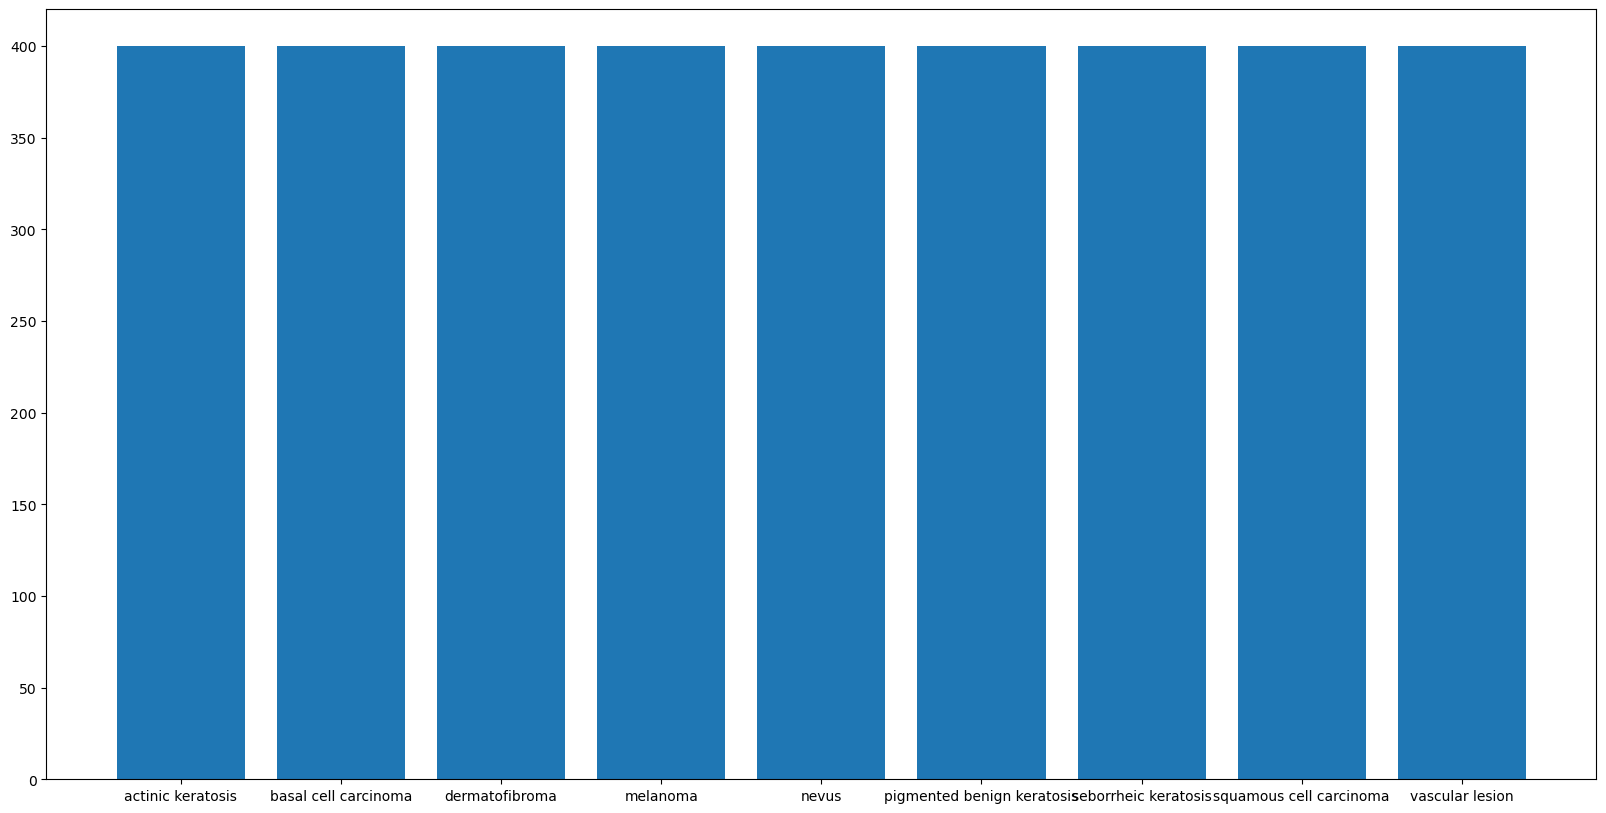

In [184]:
path = r"C:\Users\User\OneDrive\ANACONDA\Machine_Learning_Projects\Proj_10_Melanoma_Detection_CNN\Skin_Cancer_Dataset\Aug"

count=[]
num=0
for i in class_names:
    new_path = path+'\\'+i
    for entry in os.scandir(new_path):
        #print(entry)
        num +=1
    count.append(num)
    num =0
count
plt.figure(figsize=(20,10))
plt.bar(class_names, count)

Created 'Aug' folder with 400 images which includes the original and its transformed forms. Now the dataset contains 400 images in each class.

In [63]:
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    "Skin_Cancer_Dataset/Aug",
    seed = 35,
    validation_split = 0.2,
    subset = 'training',
    image_size = (240,240),
    batch_size = 32
    )
val_ds_new= tf.keras.preprocessing.image_dataset_from_directory(
    "Skin_Cancer_Dataset/Aug",
    seed = 35,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (240,240),
    batch_size = 32
    )

train_ds_new = train_ds_new.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds_new = val_ds_new.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

Found 3600 files belonging to 9 classes.
Using 2880 files for training.
Found 3600 files belonging to 9 classes.
Using 720 files for validation.


In [64]:
model_new1 = tf.keras.Sequential([
    resize_and_rescale,
    pretrained_model,
    tf.keras.layers.Dense(n_class)
])

model_new1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history1 = model_new1.fit(
    train_ds_new,
    batch_size=32,
    validation_data=val_ds_new,
    verbose=1,
    epochs=35,
)

Epoch 1/35
90/90 [==============================] - 271s 3s/step - loss: 1.5669 - acc: 0.4444 - val_loss: 1.1445 - val_acc: 0.6014
Epoch 2/35
90/90 [==============================] - 268s 3s/step - loss: 1.0677 - acc: 0.6326 - val_loss: 0.9637 - val_acc: 0.6889
Epoch 3/35
90/90 [==============================] - 277s 3s/step - loss: 0.9034 - acc: 0.6962 - val_loss: 0.8703 - val_acc: 0.7194
Epoch 4/35
90/90 [==============================] - 271s 3s/step - loss: 0.7995 - acc: 0.7361 - val_loss: 0.8087 - val_acc: 0.7319
Epoch 5/35
90/90 [==============================] - 270s 3s/step - loss: 0.7242 - acc: 0.7715 - val_loss: 0.7639 - val_acc: 0.7444
Epoch 6/35
90/90 [==============================] - 275s 3s/step - loss: 0.6659 - acc: 0.7927 - val_loss: 0.7298 - val_acc: 0.7542
Epoch 7/35
90/90 [==============================] - 272s 3s/step - loss: 0.6187 - acc: 0.8083 - val_loss: 0.7027 - val_acc: 0.7556
Epoch 8/35
90/90 [==============================] - 282s 3s/step - loss: 0.5793 - a

In [81]:
scores = model_new1.evaluate(test_ds)
scores

5/5 [==============================] - 14s 2s/step - loss: 3.3399 - acc: 0.3776


[3.3399460315704346, 0.3776223659515381]

In [75]:
history1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [77]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

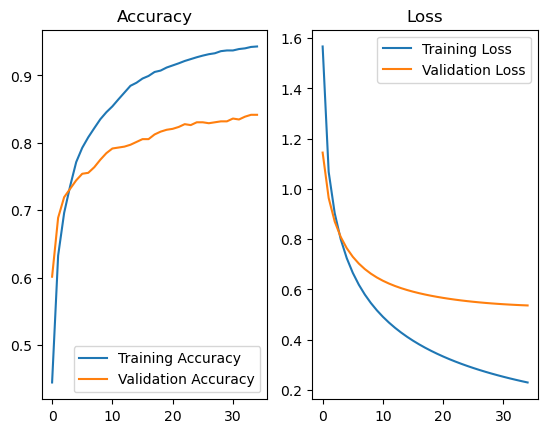

In [78]:
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(35),loss,label='Training Loss')
plt.plot(range(35),val_loss,label='Validation Loss')
plt.legend(loc="upper right")
plt.title("Loss")

plt.show()

### Display predictions on test dataset samples

1/1 [==============================] - 0s 126ms/step


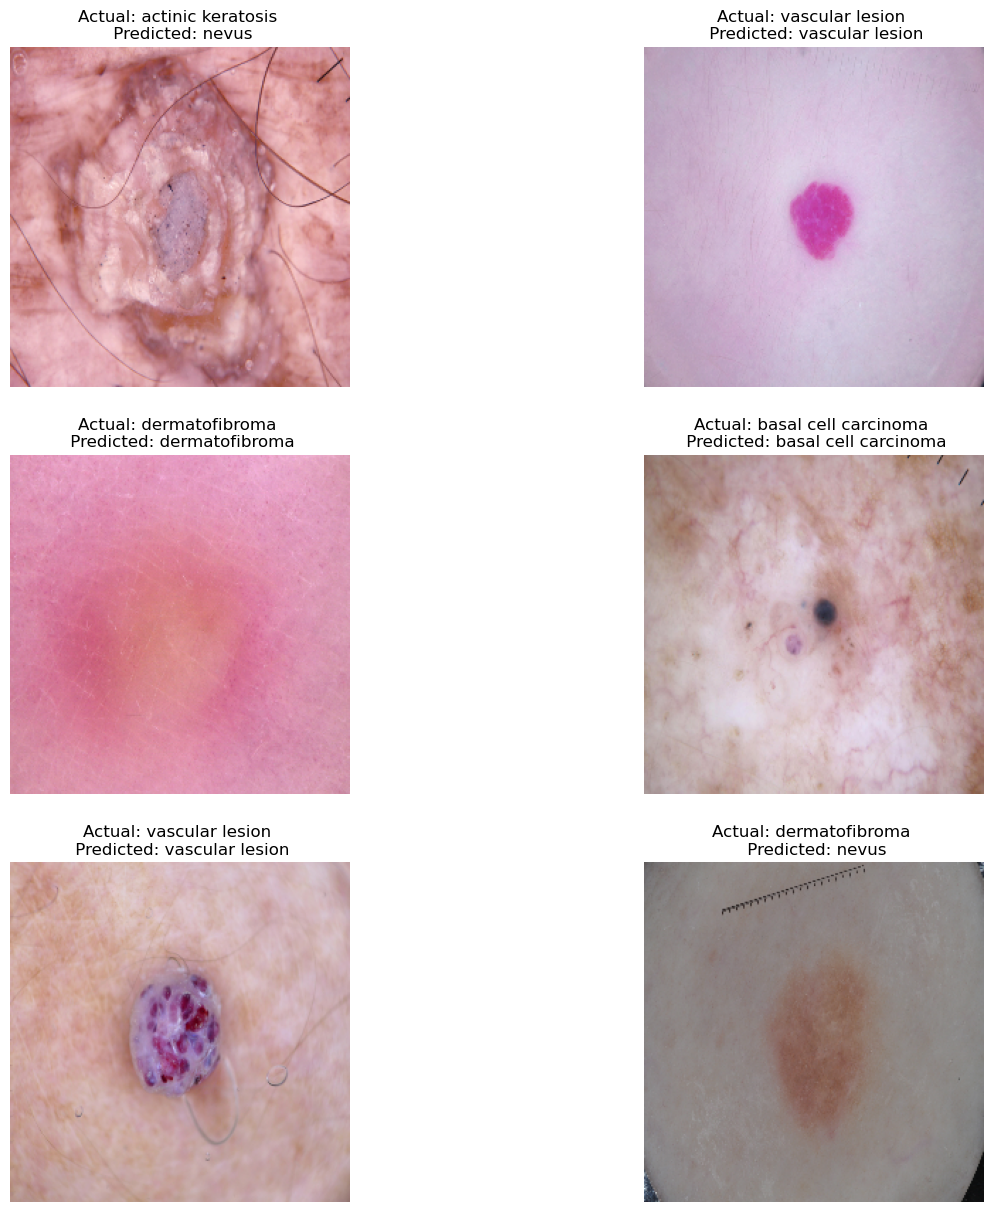

In [84]:
plt.figure(figsize=(15,15))
for i in range(0,6):
    for images, labels in test_ds.take(1):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array = tf.expand_dims(img_array, 0)
        predicted_class = class_names[np.argmax(model_new1.predict(img_array))]
        actual_class = class_names[labels[i]] 
        plt.subplot(3,2,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}")
        plt.axis("off")

### Save the model

In [66]:
joblib.dump(model_new1,'model_melanoma')

['model_melanoma']